In [42]:
pip install yfinance


  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/7d/76/31fb9c58398f4cbdde4a0831d0407a1ca987fe828c7da9ce80969014a5a1/yfinance-0.2.40-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/6a/71/3656c00606e75e81f11721e6a1c973c3e03da8c7d8b665d20f78245384c6/frozendict-2.4.4-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.0/3.0 MB 991.0 kB/s eta 0:00:03
     -- ------------------------------------- 0.2/3.0 MB 1.8 MB/s eta 0:00:02
     ------ --------------------------------- 0.5/3.0 MB 3.1 MB/s eta 0:00:01
     ----------- ---------------------------- 0.8/3.0 MB

In [43]:
import yfinance as yf


In [44]:
import yfinance as yf

# Create a Ticker object for Microsoft
msft = yf.Ticker("MSFT")

# Fetch historical data for Microsoft
msft_hist = msft.history(period="max")

# Print the historical data
print(msft_hist)


                                 Open        High         Low       Close  \
Date                                                                        
1986-03-13 00:00:00-05:00    0.054693    0.062736    0.054693    0.060055   
1986-03-14 00:00:00-05:00    0.060055    0.063272    0.060055    0.062199   
1986-03-17 00:00:00-05:00    0.062199    0.063808    0.062199    0.063272   
1986-03-18 00:00:00-05:00    0.063272    0.063808    0.061127    0.061663   
1986-03-19 00:00:00-05:00    0.061663    0.062199    0.060055    0.060591   
...                               ...         ...         ...         ...   
2024-05-17 00:00:00-04:00  422.540009  422.920013  418.029999  420.209991   
2024-05-20 00:00:00-04:00  420.209991  426.769989  419.989990  425.339996   
2024-05-21 00:00:00-04:00  426.829987  432.970001  424.850006  429.040009   
2024-05-22 00:00:00-04:00  430.089996  432.410004  427.130005  430.519989   
2024-05-23 00:00:00-04:00  432.970001  433.600006  425.420013  427.000000   

In [45]:
import os
import pandas as pd

DATA_PATH = "msft_data.json"

if os.path.exists(DATA_PATH):
    # Read from file if we've already downloaded the data.
    with open(DATA_PATH) as f:
        msft_hist = pd.read_json(DATA_PATH)
else:
    msft = yf.Ticker("MSFT")
    msft_hist = msft.history(period="max")

    # Save file to json in case we need it later.  This prevents us from having to re-download it every time.
    msft_hist.to_json(DATA_PATH)

In [46]:
msft_hist.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.054693,0.062736,0.054693,0.060055,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060055,0.063272,0.060055,0.062199,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062199,0.063808,0.062199,0.063272,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063272,0.063808,0.061127,0.061663,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.061663,0.062199,0.060055,0.060591,47894400,0.0,0.0


<Axes: xlabel='Date'>

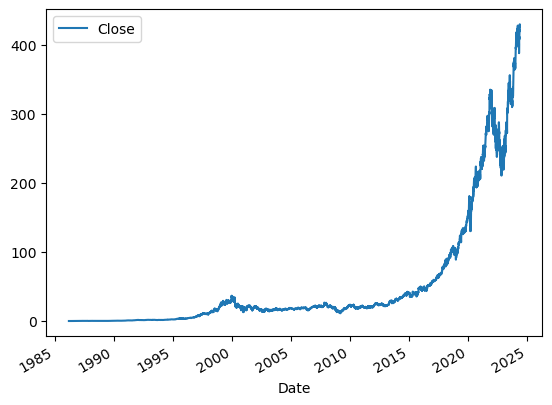

In [47]:
# Visualize microsoft stock prices
msft_hist.plot.line(y="Close", use_index=True)

In [48]:
# Ensure we know the actual closing price
data = msft_hist[["Close"]]
data = data.rename(columns = {'Close':'Actual_Close'})

# Setup our target.  This identifies if the price went up or down
data["Target"] = msft_hist.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]

In [49]:
data.head()

,Actual_Close,Target
Date,,
1986-03-13 00:00:00-05:00,0.060055,NaN
1986-03-14 00:00:00-05:00,0.062199,1.0
1986-03-17 00:00:00-05:00,0.063272,1.0
1986-03-18 00:00:00-05:00,0.061663,0.0
1986-03-19 00:00:00-05:00,0.060591,0.0


In [50]:
# Shift stock prices forward one day, so we're predicting tomorrow's stock prices from today's prices.
msft_prev = msft_hist.copy()
msft_prev = msft_prev.shift(1)

msft_prev.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-14 00:00:00-05:00,0.054693,0.062736,0.054693,0.060055,1.031789e+09,0.0,0.0
1986-03-17 00:00:00-05:00,0.060055,0.063272,0.060055,0.062199,3.081600e+08,0.0,0.0
1986-03-18 00:00:00-05:00,0.062199,0.063808,0.062199,0.063272,1.331712e+08,0.0,0.0
1986-03-19 00:00:00-05:00,0.063272,0.063808,0.061127,0.061663,6.776640e+07,0.0,0.0


In [51]:
# Create our training data
predictors = ["Close", "Volume", "Open", "High", "Low"]
data = data.join(msft_prev[predictors]).iloc[1:]

data.head()

,Actual_Close,Target,Close,Volume,Open,High,Low
Date,,,,,,,
1986-03-14 00:00:00-05:00,0.062199,1.0,0.060055,1.031789e+09,0.054693,0.062736,0.054693
1986-03-17 00:00:00-05:00,0.063272,1.0,0.062199,3.081600e+08,0.060055,0.063272,0.060055
1986-03-18 00:00:00-05:00,0.061663,0.0,0.063272,1.331712e+08,0.062199,0.063808,0.062199
1986-03-19 00:00:00-05:00,0.060591,0.0,0.061663,6.776640e+07,0.063272,0.063808,0.061127
1986-03-20 00:00:00-05:00,0.058982,0.0,0.060591,4.789440e+07,0.061663,0.062199,0.060055


In [52]:
# setting up the model

from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Create a random forest classification model.  Set min_samples_split high to ensure we don't overfit.
model = RandomForestClassifier(n_estimators=100, min_samples_split=200, random_state=1)

In [53]:
# training the model

# Create a train and test set
train = data.iloc[:-100]
test = data.iloc[-100:]

model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=200, random_state=1)

In [54]:
# measuring error

from sklearn.metrics import precision_score

# Evaluate error of predictions
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.47126436781609193

<Axes: xlabel='Date'>

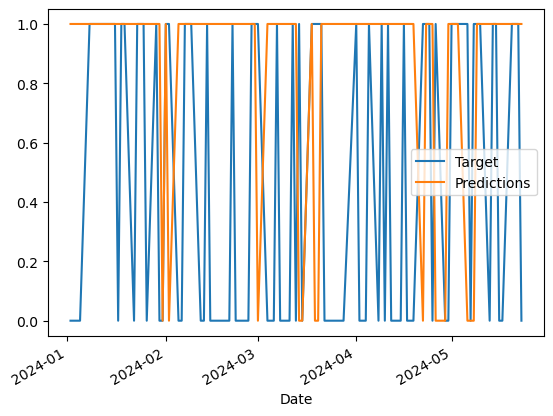

In [55]:
# backtesting

combined = pd.concat({"Target": test["Target"],"Predictions": preds}, axis=1)
combined.plot()

In [56]:
i = 1000
step = 750

train = data.iloc[0:i].copy()
test = data.iloc[i:(i+step)].copy()
model.fit(train[predictors], train["Target"])
preds = model.predict(test[predictors])

In [57]:
# predicting probabilities

preds = model.predict_proba(test[predictors])[:,1]
preds = pd.Series(preds, index=test.index)
preds[preds > .6] = 1
preds[preds<=.6] = 0

preds.head()

Date
1990-02-27 00:00:00-05:00    1.0
1990-02-28 00:00:00-05:00    1.0
1990-03-01 00:00:00-05:00    1.0
1990-03-02 00:00:00-05:00    1.0
1990-03-05 00:00:00-05:00    1.0
dtype: float64

In [58]:
predictions = []
# Loop over the dataset in increments
for i in range(1000, data.shape[0], step):
    # Split into train and test sets
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()

    # Fit the random forest model
    model.fit(train[predictors], train["Target"])

    # Make predictions
    preds = model.predict_proba(test[predictors])[:,1]
    preds = pd.Series(preds, index=test.index)
    preds[preds > .6] = 1
    preds[preds<=.6] = 0

    # Combine predictions and test values
    combined = pd.concat({"Target": test["Target"],"Predictions": preds}, axis=1)

    predictions.append(combined)

In [59]:
predictions[0].head()

,Target,Predictions
Date,,
1990-02-27 00:00:00-05:00,0.0,1.0
1990-02-28 00:00:00-05:00,1.0,1.0
1990-03-01 00:00:00-05:00,1.0,1.0
1990-03-02 00:00:00-05:00,1.0,1.0
1990-03-05 00:00:00-05:00,1.0,1.0


In [60]:
def backtest(data, model, predictors, start=1000, step=750):
    predictions = []
    # Loop over the dataset in increments
    for i in range(start, data.shape[0], step):
        # Split into train and test sets
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()

        # Fit the random forest model
        model.fit(train[predictors], train["Target"])

        # Make predictions
        preds = model.predict_proba(test[predictors])[:,1]
        preds = pd.Series(preds, index=test.index)
        preds[preds > .6] = 1
        preds[preds<=.6] = 0

        # Combine predictions and test values
        combined = pd.concat({"Target": test["Target"],"Predictions": preds}, axis=1)

        predictions.append(combined)

    return pd.concat(predictions)

In [61]:
predictions = backtest(data, model, predictors)

In [62]:
predictions["Predictions"].value_counts()

Predictions
0.0    7886
1.0     740
Name: count, dtype: int64

In [63]:
predictions["Target"].value_counts()

Target
1.0    4375
0.0    4251
Name: count, dtype: int64

In [64]:
precision_score(predictions["Target"], predictions["Predictions"])

0.49864864864864866

In [65]:
# rolling means
weekly_mean = data.rolling(7).mean()["Close"]
quarterly_mean = data.rolling(90).mean()["Close"]
annual_mean = data.rolling(365).mean()["Close"]

In [66]:
weekly_trend = data.shift(1).rolling(7).sum()["Target"]

In [67]:
data["weekly_mean"] = weekly_mean / data["Close"]
data["quarterly_mean"] = quarterly_mean / data["Close"]
data["annual_mean"] = annual_mean / data["Close"]

In [68]:
data["annual_weekly_mean"] = data["annual_mean"] / data["weekly_mean"]
data["annual_quarterly_mean"] = data["annual_mean"] / data["quarterly_mean"]

In [69]:
data["weekly_trend"] = weekly_trend

In [70]:
data["open_close_ratio"] = data["Open"] / data["Close"]
data["high_close_ratio"] = data["High"] / data["Close"]
data["low_close_ratio"] = data["Low"] / data["Close"]

In [76]:
full_predictors = predictors + ["weekly_mean", "quarterly_mean", "annual_mean", "annual_weekly_mean", "annual_quarterly_mean", "open_close_ratio", "high_close_ratio", "low_close_ratio", "weekly_trend"]
predictions = backtest(data.iloc[365:], model, full_predictors)

In [77]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5653846153846154

In [78]:
# Show how many trades we would make

predictions["Predictions"].value_counts()

Predictions
0.0    8001
1.0     260
Name: count, dtype: int64

<Axes: xlabel='Date'>

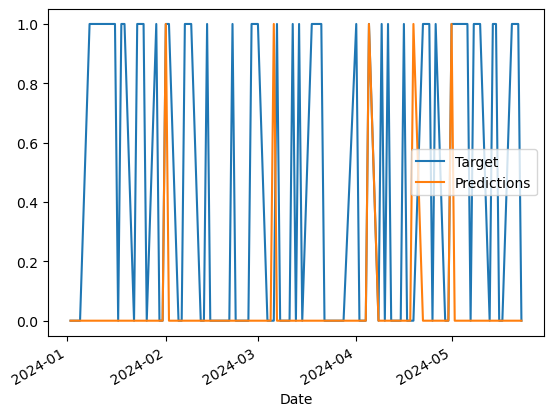

In [79]:
predictions.iloc[-100:].plot()